# EDA

In [1]:
#import libraries
from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statistics import mean,mode,median
import math

In [2]:
os.listdir()

['assignment.csv',
 'Untitled.ipynb',
 '.ipynb_checkpoints',
 'churn_predicted.xlsx',
 'Zepto_assignment_Fahad_Jamal.ipynb']

In [3]:
df = pd.read_csv('assignment.csv')

In [4]:
df["timestamp"] = pd.to_datetime(df['timestamp'])

In [5]:
# finding maximum date in the data
df["timestamp"].max(),df["timestamp"].min()

(Timestamp('2022-12-14 09:45:03.991000'),
 Timestamp('2022-08-15 18:33:11.511000'))

In [6]:
len(df['user_id'].unique()) # finding the number of users in the data

23583

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198101 entries, 0 to 198100
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         198101 non-null  object        
 1   timestamp       198101 non-null  datetime64[ns]
 2   purchase_value  198101 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.5+ MB


<AxesSubplot:xlabel='timestamp'>

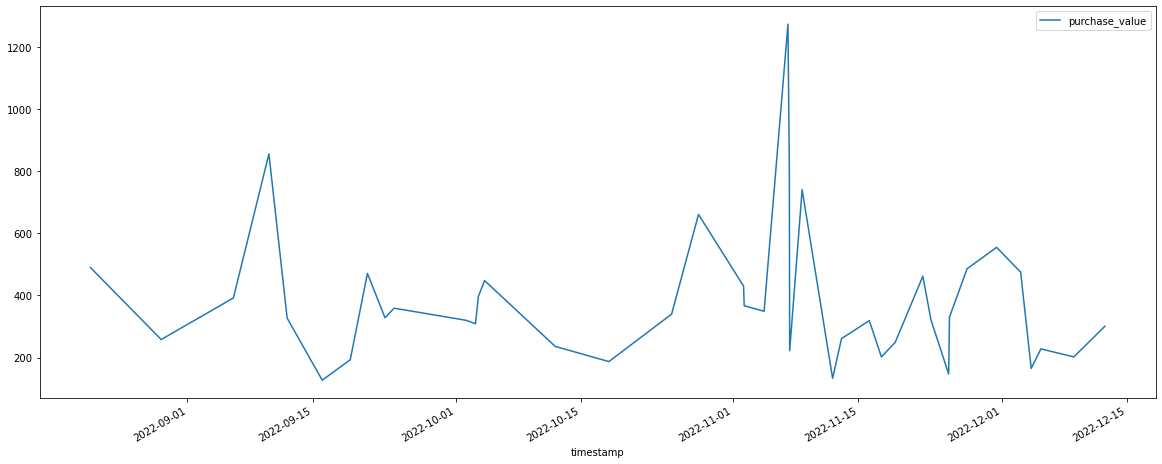

In [8]:
# Plotting the behaviour of 1 user to understand an example
df[df['user_id']=='f348dcc1ecdd88dd269eabf86dd2dd65e92ca69e841951205c583f3c3a15ecff'][["timestamp","purchase_value"]].plot(x='timestamp',y='purchase_value',figsize=(20, 8))

In [9]:
grouped_df = df.groupby(["user_id"])[["timestamp"]].agg(list)
grouped_df

,timestamp
user_id,
0000602f168960c53835096f2daad506a80fcef2b4b13af71d387ea35a3177ea,[2022-11-18 18:04:06.046000]
0001b82c569a333a80c48f2004827e4a8e5be5840fbd9b69ac0379e0de0d8dd7,[2022-09-14 13:19:47.121000]
000700164cee77c05439c206a588b66fe734150ede585f413a89f514c76fa38d,"[2022-11-07 12:15:35.732000, 2022-11-10 05:11:..."
000a4c3acfbf3baf967560f71cd0d1dd87957cfd7c027fde0795fcd297845348,[2022-11-19 09:35:14.470000]
001481e9e6ea150295c6e7664c9eb824dc2393ede3a88dfdc62d295f7d060f4c,"[2022-09-09 08:03:31.230000, 2022-12-06 14:49:..."
...,...
ffed5568a5334f55e81a298a1ddf860790ba7016e293bb1864b138f0ed535bae,"[2022-09-08 04:21:07.207000, 2022-11-08 13:54:..."
ffed85184c78f3281cef7f03f45f4d79922d78c57ebb2fae43bc956f40e087af,"[2022-11-08 04:55:24.557000, 2022-11-08 03:29:..."
fff3dca643fdb28f6a582b46b9d44279e319296d66bf751db78717cb73c23e21,"[2022-11-07 15:14:21.408000, 2022-11-10 12:12:..."


In [10]:
def get_intervals(time_list):
    return [(t - s).total_seconds()//(86400) for s, t in zip(time_list, time_list[1:])]

In [11]:
grouped_df["intervals"] = grouped_df["timestamp"].apply(lambda x: get_intervals(sorted(x)))
grouped_df["Average_individual_interval"] = grouped_df["intervals"].apply(lambda x: np.nanmean(x))
grouped_df["std_individual_interval"] = grouped_df["intervals"].apply(lambda x: np.nanstd(x))
grouped_df["individual_threshold"] = grouped_df.apply(lambda x: (x.Average_individual_interval+3*x.std_individual_interval),axis=1)
grouped_df

/var/folders/m0/mfkcgx155s333nd5p57s6sn40000gn/T/ipykernel_4761/3733255186.py:2: RuntimeWarning: Mean of empty slice
  grouped_df["Average_individual_interval"] = grouped_df["intervals"].apply(lambda x: np.nanmean(x))
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


,timestamp,intervals,Average_individual_interval,std_individual_interval,individual_threshold
user_id,,,,,
0000602f168960c53835096f2daad506a80fcef2b4b13af71d387ea35a3177ea,[2022-11-18 18:04:06.046000],[],NaN,NaN,NaN
0001b82c569a333a80c48f2004827e4a8e5be5840fbd9b69ac0379e0de0d8dd7,[2022-09-14 13:19:47.121000],[],NaN,NaN,NaN
000700164cee77c05439c206a588b66fe734150ede585f413a89f514c76fa38d,"[2022-11-07 12:15:35.732000, 2022-11-10 05:11:...","[3.0, 19.0, 12.0, 4.0, 15.0, 6.0, 6.0, 2.0, 0....",4.478261,5.224271,20.151073
000a4c3acfbf3baf967560f71cd0d1dd87957cfd7c027fde0795fcd297845348,[2022-11-19 09:35:14.470000],[],NaN,NaN,NaN
001481e9e6ea150295c6e7664c9eb824dc2393ede3a88dfdc62d295f7d060f4c,"[2022-09-09 08:03:31.230000, 2022-12-06 14:49:...",[88.0],88.000000,0.000000,88.000000
...,...,...,...,...,...
ffed5568a5334f55e81a298a1ddf860790ba7016e293bb1864b138f0ed535bae,"[2022-09-08 04:21:07.207000, 2022-11-08 13:54:...","[7.0, 0.0, 1.0, 0.0, 7.0, 1.0, 1.0, 6.0, 1.0, ...",3.913043,5.609875,20.742669
ffed85184c78f3281cef7f03f45f4d79922d78c57ebb2fae43bc956f40e087af,"[2022-11-08 04:55:24.557000, 2022-11-08 03:29:...","[2.0, 10.0, 6.0, 5.0, 4.0, 2.0, 1.0, 3.0, 5.0,...",2.914286,2.247175,9.655811
fff3dca643fdb28f6a582b46b9d44279e319296d66bf751db78717cb73c23e21,"[2022-11-07 15:14:21.408000, 2022-11-10 12:12:...","[0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 5.0, 0.0, 1.0, ...",1.901961,2.788315,10.266907


In [12]:
# finding average interval in seconds
import itertools
intervals = grouped_df["intervals"].values
intervals_list = list(itertools.chain.from_iterable(intervals))
print("mean:"+str(mean(intervals_list)),"std:"+str(np.std(intervals_list)))

mean:6.100660103828831 std:10.512463741898474


In [13]:
len(intervals_list)

174518

(array([1.48191e+05, 1.60330e+04, 5.46800e+03, 2.33400e+03, 1.22600e+03,
        6.47000e+02, 3.53000e+02, 1.63000e+02, 7.90000e+01, 2.40000e+01]),
 array([  0. ,  11.9,  23.8,  35.7,  47.6,  59.5,  71.4,  83.3,  95.2,
        107.1, 119. ]),
 <BarContainer object of 10 artists>)

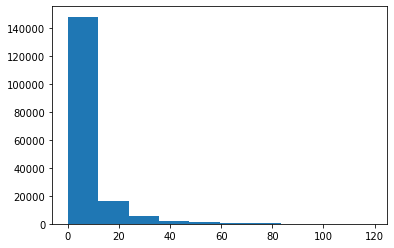

In [14]:
plt.hist(intervals_list)

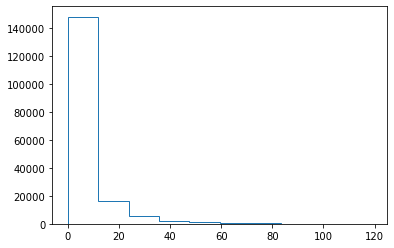

In [15]:
counts, bins = np.histogram(intervals_list)
plt.stairs(counts, bins)

In [16]:
bins

array([  0. ,  11.9,  23.8,  35.7,  47.6,  59.5,  71.4,  83.3,  95.2,
       107.1, 119. ])

Let's do a 3 sigma analysis that is we are assuming that typically a customer would wait a maximum time of mean+3*sigma to order next.

In [17]:
threshold = mean(intervals_list)+3*np.std(intervals_list)
print(threshold)

37.63805132952425


# Prediction

In [18]:
most_recent_date = df["timestamp"].max()
most_recent_date

Timestamp('2022-12-14 09:45:03.991000')

In [19]:
grouped_df.dtypes


timestamp                       object
intervals                       object
Average_individual_interval    float64
std_individual_interval        float64
individual_threshold           float64
dtype: object

In [20]:
# calculating time from last order in days
grouped_df["time_from_last_order"] = grouped_df["timestamp"].apply(lambda x: (most_recent_date-max(x)).total_seconds()//86400)
grouped_df

,timestamp,intervals,Average_individual_interval,std_individual_interval,individual_threshold,time_from_last_order
user_id,,,,,,
0000602f168960c53835096f2daad506a80fcef2b4b13af71d387ea35a3177ea,[2022-11-18 18:04:06.046000],[],NaN,NaN,NaN,25.0
0001b82c569a333a80c48f2004827e4a8e5be5840fbd9b69ac0379e0de0d8dd7,[2022-09-14 13:19:47.121000],[],NaN,NaN,NaN,90.0
000700164cee77c05439c206a588b66fe734150ede585f413a89f514c76fa38d,"[2022-11-07 12:15:35.732000, 2022-11-10 05:11:...","[3.0, 19.0, 12.0, 4.0, 15.0, 6.0, 6.0, 2.0, 0....",4.478261,5.224271,20.151073,1.0
000a4c3acfbf3baf967560f71cd0d1dd87957cfd7c027fde0795fcd297845348,[2022-11-19 09:35:14.470000],[],NaN,NaN,NaN,25.0
001481e9e6ea150295c6e7664c9eb824dc2393ede3a88dfdc62d295f7d060f4c,"[2022-09-09 08:03:31.230000, 2022-12-06 14:49:...",[88.0],88.000000,0.000000,88.000000,7.0
...,...,...,...,...,...,...
ffed5568a5334f55e81a298a1ddf860790ba7016e293bb1864b138f0ed535bae,"[2022-09-08 04:21:07.207000, 2022-11-08 13:54:...","[7.0, 0.0, 1.0, 0.0, 7.0, 1.0, 1.0, 6.0, 1.0, ...",3.913043,5.609875,20.742669,15.0
ffed85184c78f3281cef7f03f45f4d79922d78c57ebb2fae43bc956f40e087af,"[2022-11-08 04:55:24.557000, 2022-11-08 03:29:...","[2.0, 10.0, 6.0, 5.0, 4.0, 2.0, 1.0, 3.0, 5.0,...",2.914286,2.247175,9.655811,0.0
fff3dca643fdb28f6a582b46b9d44279e319296d66bf751db78717cb73c23e21,"[2022-11-07 15:14:21.408000, 2022-11-10 12:12:...","[0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 5.0, 0.0, 1.0, ...",1.901961,2.788315,10.266907,0.0


In [21]:
def churn_predict(days_from_last_order,threshold,individual_threshold):
    if math.isnan(individual_threshold):
        if days_from_last_order>threshold:
            return 1
        else:
            return 0
    else:
        if days_from_last_order>max(individual_threshold,threshold):
            return 1
        else:
            return 0

In [22]:
grouped_df.columns

Index(['timestamp', 'intervals', 'Average_individual_interval',
       'std_individual_interval', 'individual_threshold',
       'time_from_last_order'],
      dtype='object')

In [23]:
grouped_df["churn_predicted"] = grouped_df.apply(lambda x: churn_predict(x.time_from_last_order,threshold,x.individual_threshold),axis=1)
grouped_df

,timestamp,intervals,Average_individual_interval,std_individual_interval,individual_threshold,time_from_last_order,churn_predicted
user_id,,,,,,,
0000602f168960c53835096f2daad506a80fcef2b4b13af71d387ea35a3177ea,[2022-11-18 18:04:06.046000],[],NaN,NaN,NaN,25.0,0
0001b82c569a333a80c48f2004827e4a8e5be5840fbd9b69ac0379e0de0d8dd7,[2022-09-14 13:19:47.121000],[],NaN,NaN,NaN,90.0,1
000700164cee77c05439c206a588b66fe734150ede585f413a89f514c76fa38d,"[2022-11-07 12:15:35.732000, 2022-11-10 05:11:...","[3.0, 19.0, 12.0, 4.0, 15.0, 6.0, 6.0, 2.0, 0....",4.478261,5.224271,20.151073,1.0,0
000a4c3acfbf3baf967560f71cd0d1dd87957cfd7c027fde0795fcd297845348,[2022-11-19 09:35:14.470000],[],NaN,NaN,NaN,25.0,0
001481e9e6ea150295c6e7664c9eb824dc2393ede3a88dfdc62d295f7d060f4c,"[2022-09-09 08:03:31.230000, 2022-12-06 14:49:...",[88.0],88.000000,0.000000,88.000000,7.0,0
...,...,...,...,...,...,...,...
ffed5568a5334f55e81a298a1ddf860790ba7016e293bb1864b138f0ed535bae,"[2022-09-08 04:21:07.207000, 2022-11-08 13:54:...","[7.0, 0.0, 1.0, 0.0, 7.0, 1.0, 1.0, 6.0, 1.0, ...",3.913043,5.609875,20.742669,15.0,0
ffed85184c78f3281cef7f03f45f4d79922d78c57ebb2fae43bc956f40e087af,"[2022-11-08 04:55:24.557000, 2022-11-08 03:29:...","[2.0, 10.0, 6.0, 5.0, 4.0, 2.0, 1.0, 3.0, 5.0,...",2.914286,2.247175,9.655811,0.0,0
fff3dca643fdb28f6a582b46b9d44279e319296d66bf751db78717cb73c23e21,"[2022-11-07 15:14:21.408000, 2022-11-10 12:12:...","[0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 5.0, 0.0, 1.0, ...",1.901961,2.788315,10.266907,0.0,0


In [24]:
grouped_df[grouped_df["churn_predicted"]==1]

,timestamp,intervals,Average_individual_interval,std_individual_interval,individual_threshold,time_from_last_order,churn_predicted
user_id,,,,,,,
0001b82c569a333a80c48f2004827e4a8e5be5840fbd9b69ac0379e0de0d8dd7,[2022-09-14 13:19:47.121000],[],NaN,NaN,NaN,90.0,1
0021cd67f7943f1378af2b4dcc081106dfde40b4717653578ebc90b9db5d62f1,"[2022-09-18 07:38:05.236000, 2022-10-12 18:42:...",[24.0],24.00,0.000000,24.000000,62.0,1
00237edf927db093ae1e2d3ffbab9272e3fdd5927b3b39c9f8b9df963c542c32,[2022-08-17 07:46:57.485000],[],NaN,NaN,NaN,119.0,1
002b3a54d2a9802624be8ff00d98f1194f07f87cac372f456d57a5bf23446377,"[2022-10-03 15:30:50.843000, 2022-10-07 18:29:...",[4.0],4.00,0.000000,4.000000,67.0,1
002fbb69d2d89328a4a32bac2763967c8b60b127a0aefbb1c2027f874cc7898f,[2022-10-11 15:53:11.133000],[],NaN,NaN,NaN,63.0,1
...,...,...,...,...,...,...,...
ffe49ded3ac1738992db16bdb8822e4876f69ba7f47d7684538d06e3b98663a4,"[2022-09-13 07:50:56.298000, 2022-09-16 15:04:...","[3.0, 15.0, 1.0, 25.0]",11.00,9.695360,40.086079,46.0,1
ffe5e2171e19a1ad4b9b6741620385f53fa462539666ba5bd9189be58b1f5a90,"[2022-09-11 12:42:54.141000, 2022-09-10 13:58:...","[0.0, 15.0]",7.50,7.500000,30.000000,78.0,1
ffe64025e8c2d822bb6f4c16d2b83fe0c617d9173b4c02590103aab1bb6051ee,"[2022-09-17 07:57:06.839000, 2022-10-01 15:58:...","[11.0, 11.0, 3.0, 18.0]",10.75,5.309190,26.677570,54.0,1


In [25]:
grouped_df.to_excel("churn_predicted.xlsx")


# Explore customer behaviour patterns and define appropriate segments

In [26]:
seg_df = df.groupby(["user_id"])[["purchase_value"]].agg(sum)
seg_df

,purchase_value
user_id,
0000602f168960c53835096f2daad506a80fcef2b4b13af71d387ea35a3177ea,132.0
0001b82c569a333a80c48f2004827e4a8e5be5840fbd9b69ac0379e0de0d8dd7,113.0
000700164cee77c05439c206a588b66fe734150ede585f413a89f514c76fa38d,4727.0
000a4c3acfbf3baf967560f71cd0d1dd87957cfd7c027fde0795fcd297845348,139.0
001481e9e6ea150295c6e7664c9eb824dc2393ede3a88dfdc62d295f7d060f4c,482.0
...,...
ffed5568a5334f55e81a298a1ddf860790ba7016e293bb1864b138f0ed535bae,11569.0
ffed85184c78f3281cef7f03f45f4d79922d78c57ebb2fae43bc956f40e087af,18476.0
fff3dca643fdb28f6a582b46b9d44279e319296d66bf751db78717cb73c23e21,16529.0


In [27]:
seg_df_features = df.reset_index().groupby( [ "user_id"],as_index=False ).aggregate({"purchase_value":[sum,min,max,mean,mode,np.size],"timestamp":[min,max]})
seg_df_features

user_id purchase_value  \
                                                                    sum   
0      0000602f168960c53835096f2daad506a80fcef2b4b13a...          132.0   
1      0001b82c569a333a80c48f2004827e4a8e5be5840fbd9b...          113.0   
2      000700164cee77c05439c206a588b66fe734150ede585f...         4727.0   
3      000a4c3acfbf3baf967560f71cd0d1dd87957cfd7c027f...          139.0   
4      001481e9e6ea150295c6e7664c9eb824dc2393ede3a88d...          482.0   
...                                                  ...            ...   
23578  ffed5568a5334f55e81a298a1ddf860790ba7016e293bb...        11569.0   
23579  ffed85184c78f3281cef7f03f45f4d79922d78c57ebb2f...        18476.0   
23580  fff3dca643fdb28f6a582b46b9d44279e319296d66bf75...        16529.0   
23581  fff3dcdeb160d90148711b4144d009edbafecde079fcc5...           70.0   
23582  fff8228534eaf9d70eee285014632a38e9567ffd4f38b9...          341.0   

                                                           timestamp  \
         min     max        mean   mode size                     min   
0      132.0   132.0  132.000000  132.0    1 2022-11-18 18:04:06.046   
1      113.0   113.0  113.000000  113.0    1 2022-09-14 13:19:47.121   
2       67.0   646.0  196.958333  104.0   24 2022-08-22 01:56:48.002   
3      139.0   139.0  139.000000  139.0    1 2022-11-19 09:35:14.470   
4      155.0   327.0  241.000000  327.0    2 2022-09-09 08:03:31.230   
...      ...     ...         ...    ...  ...                     ...   
23578  135.0  1766.0  482.041667  761.0   24 2022-08-18 04:41:29.660   
23579  192.0  1509.0  513.222222  332.0   36 2022-08-18 01:51:55.233   
23580   43.0  1335.0  317.865385  345.0   52 2022-08-16 03:33:45.863   
23581   70.0    70.0   70.000000   70.0    1 2022-09-18 04:50:24.521   
23582  158.0   183.0  170.500000  158.0    2 2022-11-14 02:02:28.166   

                               
                          max  
0     2022-11-18 18:04:06.046  
1     2022-09-14 13:19:47.121  
2     2022-12-13 06:21:59.274  
3     2022-11-19 09:35:14.470  
4     2022-12-06 14:49:45.260  
...                       ...  
23578 2022-11-28 12:51:38.860  
23579 2022-12-14 03:24:23.262  
23580 2022-12-13 18:06:35.536  
23581 2022-09-18 04:50:24.521  
23582 2022-12-12 15:38:04.396  

[23583 rows x 9 columns]

In [28]:
seg_df_features.columns = ['_'.join(x).strip("_") for x in seg_df_features.columns]

In [29]:
seg_df_features.columns

Index(['user_id', 'purchase_value_sum', 'purchase_value_min',
       'purchase_value_max', 'purchase_value_mean', 'purchase_value_mode',
       'purchase_value_size', 'timestamp_min', 'timestamp_max'],
      dtype='object')

In [30]:
seg_df_features["customer_life"] = seg_df_features["timestamp_min"].apply(lambda x: (most_recent_date-x).days+1)
seg_df_features

,user_id,purchase_value_sum,purchase_value_min,purchase_value_max,purchase_value_mean,purchase_value_mode,purchase_value_size,timestamp_min,timestamp_max,customer_life
0,0000602f168960c53835096f2daad506a80fcef2b4b13a...,132.0,132.0,132.0,132.000000,132.0,1,2022-11-18 18:04:06.046,2022-11-18 18:04:06.046,26
1,0001b82c569a333a80c48f2004827e4a8e5be5840fbd9b...,113.0,113.0,113.0,113.000000,113.0,1,2022-09-14 13:19:47.121,2022-09-14 13:19:47.121,91
2,000700164cee77c05439c206a588b66fe734150ede585f...,4727.0,67.0,646.0,196.958333,104.0,24,2022-08-22 01:56:48.002,2022-12-13 06:21:59.274,115
3,000a4c3acfbf3baf967560f71cd0d1dd87957cfd7c027f...,139.0,139.0,139.0,139.000000,139.0,1,2022-11-19 09:35:14.470,2022-11-19 09:35:14.470,26
4,001481e9e6ea150295c6e7664c9eb824dc2393ede3a88d...,482.0,155.0,327.0,241.000000,327.0,2,2022-09-09 08:03:31.230,2022-12-06 14:49:45.260,97
...,...,...,...,...,...,...,...,...,...,...
23578,ffed5568a5334f55e81a298a1ddf860790ba7016e293bb...,11569.0,135.0,1766.0,482.041667,761.0,24,2022-08-18 04:41:29.660,2022-11-28 12:51:38.860,119
23579,ffed85184c78f3281cef7f03f45f4d79922d78c57ebb2f...,18476.0,192.0,1509.0,513.222222,332.0,36,2022-08-18 01:51:55.233,2022-12-14 03:24:23.262,119
23580,fff3dca643fdb28f6a582b46b9d44279e319296d66bf75...,16529.0,43.0,1335.0,317.865385,345.0,52,2022-08-16 03:33:45.863,2022-12-13 18:06:35.536,121
23581,fff3dcdeb160d90148711b4144d009edbafecde079fcc5...,70.0,70.0,70.0,70.000000,70.0,1,2022-09-18 04:50:24.521,2022-09-18 04:50:24.521,88


In [31]:
seg_df_features["purchase_value_per_day"] = seg_df_features["purchase_value_sum"]//seg_df_features["customer_life"]
seg_df_features

,user_id,purchase_value_sum,purchase_value_min,purchase_value_max,purchase_value_mean,purchase_value_mode,purchase_value_size,timestamp_min,timestamp_max,customer_life,purchase_value_per_day
0,0000602f168960c53835096f2daad506a80fcef2b4b13a...,132.0,132.0,132.0,132.000000,132.0,1,2022-11-18 18:04:06.046,2022-11-18 18:04:06.046,26,5.0
1,0001b82c569a333a80c48f2004827e4a8e5be5840fbd9b...,113.0,113.0,113.0,113.000000,113.0,1,2022-09-14 13:19:47.121,2022-09-14 13:19:47.121,91,1.0
2,000700164cee77c05439c206a588b66fe734150ede585f...,4727.0,67.0,646.0,196.958333,104.0,24,2022-08-22 01:56:48.002,2022-12-13 06:21:59.274,115,41.0
3,000a4c3acfbf3baf967560f71cd0d1dd87957cfd7c027f...,139.0,139.0,139.0,139.000000,139.0,1,2022-11-19 09:35:14.470,2022-11-19 09:35:14.470,26,5.0
4,001481e9e6ea150295c6e7664c9eb824dc2393ede3a88d...,482.0,155.0,327.0,241.000000,327.0,2,2022-09-09 08:03:31.230,2022-12-06 14:49:45.260,97,4.0
...,...,...,...,...,...,...,...,...,...,...,...
23578,ffed5568a5334f55e81a298a1ddf860790ba7016e293bb...,11569.0,135.0,1766.0,482.041667,761.0,24,2022-08-18 04:41:29.660,2022-11-28 12:51:38.860,119,97.0
23579,ffed85184c78f3281cef7f03f45f4d79922d78c57ebb2f...,18476.0,192.0,1509.0,513.222222,332.0,36,2022-08-18 01:51:55.233,2022-12-14 03:24:23.262,119,155.0
23580,fff3dca643fdb28f6a582b46b9d44279e319296d66bf75...,16529.0,43.0,1335.0,317.865385,345.0,52,2022-08-16 03:33:45.863,2022-12-13 18:06:35.536,121,136.0
23581,fff3dcdeb160d90148711b4144d009edbafecde079fcc5...,70.0,70.0,70.0,70.000000,70.0,1,2022-09-18 04:50:24.521,2022-09-18 04:50:24.521,88,0.0


In [32]:
seg_df_features.dtypes

user_id                           object
purchase_value_sum               float64
purchase_value_min               float64
purchase_value_max               float64
purchase_value_mean              float64
purchase_value_mode              float64
purchase_value_size                int64
timestamp_min             datetime64[ns]
timestamp_max             datetime64[ns]
customer_life                      int64
purchase_value_per_day           float64
dtype: object

In [33]:
seg_df_features = seg_df_features[seg_df_features['purchase_value_per_day']<seg_df_features['purchase_value_per_day'].quantile(0.999)]

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42).fit(seg_df_features[["purchase_value_per_day"]].values)
kmeans.labels_

array([0, 0, 0, ..., 3, 0, 0], dtype=int32)

In [35]:
set(kmeans.labels_)

{0, 1, 2, 3}

In [36]:
kmeans.cluster_centers_

array([[ 13.22036509],
       [ 71.5819691 ],
       [361.36426117],
       [172.97144897]])

In [37]:
seg_df_features["clusters"] = kmeans.predict(seg_df_features[["purchase_value_per_day"]])

/var/folders/m0/mfkcgx155s333nd5p57s6sn40000gn/T/ipykernel_4761/2528821598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg_df_features["clusters"] = kmeans.predict(seg_df_features[["purchase_value_per_day"]])


In [38]:
seg_df_features[seg_df_features["clusters"]==3]

,user_id,purchase_value_sum,purchase_value_min,purchase_value_max,purchase_value_mean,purchase_value_mode,purchase_value_size,timestamp_min,timestamp_max,customer_life,purchase_value_per_day,clusters
5,001726a658360a6d132183dfbf194fcf612b7d7fec905a...,10423.0,233.0,1221.0,496.333333,308.0,21,2022-09-29 03:18:18.375,2022-12-11 12:12:49.149,77,135.0,3
11,00276702d3dfe405faae5865d69f7591f17cfb3b4911a4...,22043.0,81.0,1259.0,361.360656,105.0,61,2022-08-17 07:42:29.439,2022-12-12 01:47:49.055,120,183.0,3
45,0077ecd6eb5a9240d81f9a1ca28878b333a971dc486066...,1828.0,394.0,927.0,609.333333,394.0,3,2022-12-01 05:46:25.085,2022-12-11 13:28:08.984,14,130.0,3
58,009f92b72ebe5d362e4cfdf39cfb19aa3b99290dfc4114...,16655.0,87.0,1932.0,693.958333,828.0,24,2022-08-17 12:57:36.912,2022-12-13 05:26:29.499,119,139.0,3
66,00afbf9b0b897eace196c1f5ea216adee9bed97bef8591...,7824.0,192.0,1417.0,558.857143,1417.0,14,2022-11-01 14:41:52.161,2022-12-12 11:50:40.775,43,181.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
23533,ff5de38f307b99c76f27b66023c933bad8744a15331af5...,23745.0,43.0,1086.0,320.878378,235.0,74,2022-08-20 10:04:44.588,2022-12-14 05:07:33.964,116,204.0,3
23539,ff75eb1badb8da9da3688638bb8ab21c42c7425e5d1f39...,18523.0,127.0,1051.0,313.949153,324.0,59,2022-08-16 15:01:50.319,2022-12-12 15:02:13.788,120,154.0,3
23564,ffc6f36af17cdafe2f1c32be02de6e2978deb9e656913c...,4158.0,238.0,1803.0,1039.500000,1610.0,4,2022-11-16 14:01:37.314,2022-12-12 16:03:57.784,28,148.0,3
23579,ffed85184c78f3281cef7f03f45f4d79922d78c57ebb2f...,18476.0,192.0,1509.0,513.222222,332.0,36,2022-08-18 01:51:55.233,2022-12-14 03:24:23.262,119,155.0,3


In [39]:
segments={1:"low value segment",0:"Lower medium value segment",3:"Upper medium value segment",2:"High value segment"}

In [40]:
seg_df_features["customer_segment"] = seg_df_features["clusters"].apply(lambda x: segments[x])

/var/folders/m0/mfkcgx155s333nd5p57s6sn40000gn/T/ipykernel_4761/3088600330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg_df_features["customer_segment"] = seg_df_features["clusters"].apply(lambda x: segments[x])


In [41]:
seg_df_features

,user_id,purchase_value_sum,purchase_value_min,purchase_value_max,purchase_value_mean,purchase_value_mode,purchase_value_size,timestamp_min,timestamp_max,customer_life,purchase_value_per_day,clusters,customer_segment
0,0000602f168960c53835096f2daad506a80fcef2b4b13a...,132.0,132.0,132.0,132.000000,132.0,1,2022-11-18 18:04:06.046,2022-11-18 18:04:06.046,26,5.0,0,Lower medium value segment
1,0001b82c569a333a80c48f2004827e4a8e5be5840fbd9b...,113.0,113.0,113.0,113.000000,113.0,1,2022-09-14 13:19:47.121,2022-09-14 13:19:47.121,91,1.0,0,Lower medium value segment
2,000700164cee77c05439c206a588b66fe734150ede585f...,4727.0,67.0,646.0,196.958333,104.0,24,2022-08-22 01:56:48.002,2022-12-13 06:21:59.274,115,41.0,0,Lower medium value segment
3,000a4c3acfbf3baf967560f71cd0d1dd87957cfd7c027f...,139.0,139.0,139.0,139.000000,139.0,1,2022-11-19 09:35:14.470,2022-11-19 09:35:14.470,26,5.0,0,Lower medium value segment
4,001481e9e6ea150295c6e7664c9eb824dc2393ede3a88d...,482.0,155.0,327.0,241.000000,327.0,2,2022-09-09 08:03:31.230,2022-12-06 14:49:45.260,97,4.0,0,Lower medium value segment
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23578,ffed5568a5334f55e81a298a1ddf860790ba7016e293bb...,11569.0,135.0,1766.0,482.041667,761.0,24,2022-08-18 04:41:29.660,2022-11-28 12:51:38.860,119,97.0,1,low value segment
23579,ffed85184c78f3281cef7f03f45f4d79922d78c57ebb2f...,18476.0,192.0,1509.0,513.222222,332.0,36,2022-08-18 01:51:55.233,2022-12-14 03:24:23.262,119,155.0,3,Upper medium value segment
23580,fff3dca643fdb28f6a582b46b9d44279e319296d66bf75...,16529.0,43.0,1335.0,317.865385,345.0,52,2022-08-16 03:33:45.863,2022-12-13 18:06:35.536,121,136.0,3,Upper medium value segment
23581,fff3dcdeb160d90148711b4144d009edbafecde079fcc5...,70.0,70.0,70.0,70.000000,70.0,1,2022-09-18 04:50:24.521,2022-09-18 04:50:24.521,88,0.0,0,Lower medium value segment


# Customer LTV (Life Time value) Analysis

In [42]:

# #create tx_user for assigning clustering
df_user = pd.DataFrame(df['user_id'].unique())
df_user.columns = ['user_id']

# #order cluster method
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final


#calculate recency score
df_max_purchase = df.groupby('user_id').timestamp.max().reset_index()
df_max_purchase.columns = ['user_id','MaxPurchaseDate']
df_max_purchase['Recency'] = (df_max_purchase['MaxPurchaseDate'].max() - df_max_purchase['MaxPurchaseDate']).dt.days
df_user = pd.merge(df_user, df_max_purchase[['user_id','Recency']], on='user_id')

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_user[['Recency']])
df_user['RecencyCluster'] = kmeans.predict(df_user[['Recency']])

df_user = order_cluster('RecencyCluster', 'Recency',df_user,False)

#calcuate frequency score
df_frequency = df.groupby('user_id').timestamp.count().reset_index()
df_frequency.columns = ['user_id','Frequency']
df_user = pd.merge(df_user, df_frequency, on='user_id')

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_user[['Frequency']])
df_user['FrequencyCluster'] = kmeans.predict(df_user[['Frequency']])

df_user = order_cluster('FrequencyCluster', 'Frequency',df_user,True)

#calcuate revenue score
df_revenue = df.groupby('user_id').purchase_value.sum().reset_index()
df_user = pd.merge(df_user, df_revenue, on='user_id')

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_user[['purchase_value']])
df_user['purchase_value_cluster'] = kmeans.predict(df_user[['purchase_value']])
df_user = order_cluster('purchase_value_cluster', 'purchase_value',df_user,True)


#overall scoring
df_user['OverallScore'] = df_user['purchase_value_cluster'] + df_user['FrequencyCluster'] + df_user['purchase_value_cluster']
df_user['Segment'] = 'Low-Value'
df_user.loc[df_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
df_user.loc[df_user['OverallScore']>4,'Segment'] = 'High-Value' 


In [43]:
df_user.head()

,user_id,Recency,RecencyCluster,Frequency,FrequencyCluster,purchase_value,purchase_value_cluster,OverallScore,Segment
0,f348dcc1ecdd88dd269eabf86dd2dd65e92ca69e841951...,1,3,41,2,15726.0,2,6,High-Value
1,815bcad338795606138d9fb381d25f8ebd091259768bfa...,1,3,40,2,17293.0,2,6,High-Value
2,11dad03575fe6bd22a15094ee9e3a826973ca0ff2f269a...,0,3,34,2,16934.0,2,6,High-Value
3,bd371bcb3df98385c2702ccc50bf9c2bfdad52b9d4b674...,0,3,43,2,15529.0,2,6,High-Value
4,ac3623b09433b2276e2e4a3f320462083f6aed4373ca7c...,11,3,46,2,21586.0,2,6,High-Value


In [44]:
#remove outliers
df_user = df_user[df_user['purchase_value']<df_user['purchase_value'].quantile(0.99)]


#creating 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_user[['purchase_value']])
df_user['LTVCluster'] = kmeans.predict(df_user[['purchase_value']])

#order cluster number based on LTV
df_user = order_cluster('LTVCluster', 'purchase_value',df_user,True)

#creatinga new cluster dataframe
df_cluster = df_user.copy()

#see details of the clusters
df_cluster.groupby('LTVCluster')['purchase_value'].describe()


,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,18502.0,1044.929954,992.218898,22.0,272.0,653.5,1535.75,4061.0
1,3723.0,7092.055600,2330.068893,4064.0,5074.5,6598.0,8728.50,12621.0
2,1122.0,18170.762032,4406.455758,12629.0,14551.0,16934.0,20914.25,29660.0


In [45]:
df_cluster

,user_id,Recency,RecencyCluster,Frequency,FrequencyCluster,purchase_value,purchase_value_cluster,OverallScore,Segment,LTVCluster
0,f348dcc1ecdd88dd269eabf86dd2dd65e92ca69e841951...,1,3,41,2,15726.0,2,6,High-Value,2
1,815bcad338795606138d9fb381d25f8ebd091259768bfa...,1,3,40,2,17293.0,2,6,High-Value,2
2,11dad03575fe6bd22a15094ee9e3a826973ca0ff2f269a...,0,3,34,2,16934.0,2,6,High-Value,2
3,bd371bcb3df98385c2702ccc50bf9c2bfdad52b9d4b674...,0,3,43,2,15529.0,2,6,High-Value,2
4,ac3623b09433b2276e2e4a3f320462083f6aed4373ca7c...,11,3,46,2,21586.0,2,6,High-Value,2
...,...,...,...,...,...,...,...,...,...,...
23342,a9a856472fdfd162a756e55f034b34c02abdf882a47d50...,50,1,1,0,603.0,0,0,Low-Value,0
23343,ed5a3581189d7534c4472f290a0ddf54f6d141cc6fe9d5...,50,1,1,0,293.0,0,0,Low-Value,0
23344,58ede32593b0e5546c443227e2461a018e662579d77d87...,50,1,1,0,87.0,0,0,Low-Value,0
23345,9bde07b60e8409cc4e2f9d3f2f7cfe56ae153b0b817082...,50,1,1,0,230.0,0,0,Low-Value,0
